In [1]:
import pandas as pd
from nilm_pre_processing import NilmPreProcessing

In [2]:
nilm_pp = NilmPreProcessing()

In [3]:
data_df = pd.read_csv("/opt/nilm-shared-data/nilm_device_detection/VNDALE_v1/fix_raw_data/20240113_data_maysay_1.csv")
data_df.head()

,currentWaveform,voltageWaveform,powerFactor,Time
0,0.296348,-8.439324,91.83773,2024-01-13_17-38-39
1,0.421163,89.492844,91.83773,2024-01-13_17-38-39
2,0.394800,190.682678,91.83773,2024-01-13_17-38-39
3,0.375028,225.971924,91.83773,2024-01-13_17-38-39
4,0.352923,221.640533,91.83773,2024-01-13_17-38-39


In [4]:
data_df['unix_ts'] = pd.to_datetime(data_df['Time'], format="%Y-%m-%d_%H-%M-%S").astype('int64') // 10**9
data_df.drop(columns=['Time'], inplace=True)
data_df.head()

,currentWaveform,voltageWaveform,powerFactor,unix_ts
0,0.296348,-8.439324,91.83773,1705167519
1,0.421163,89.492844,91.83773,1705167519
2,0.394800,190.682678,91.83773,1705167519
3,0.375028,225.971924,91.83773,1705167519
4,0.352923,221.640533,91.83773,1705167519


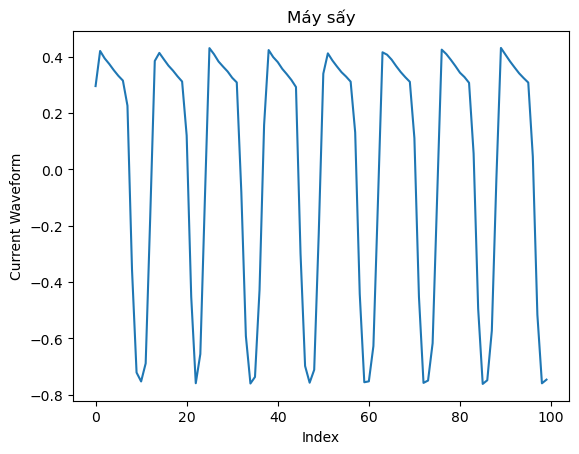

In [17]:
import matplotlib.pyplot as plt
plot_data = data_df[['unix_ts', 'currentWaveform']][0:100]
plt.plot(plot_data.index, plot_data['currentWaveform'])
plt.title("Máy sấy")
plt.xlabel("Index")
plt.ylabel("Current Waveform")
plt.show()